<a href="https://colab.research.google.com/github/PriyankaDhar2/Minor-Projects/blob/main/OnlineRetailClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# Data Loading and Preprocessing

In [ ]:
# Loading the dataset here into a Pandas DataFrame
dfall = pd.read_csv("/content/Online Retail.csv") #I have turned the data into a csv file format.
dfall.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#The number of rows & columns
dfall.shape

(541909, 8)

In [ ]:
dfall.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#Dropping irrelevant columns
df = dfall.drop(['InvoiceNo', 'Description', 'Country'], axis=1)

In [ ]:
df.columns

Index(['StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'], dtype='object')

In [ ]:
#Getting an overall summary of the data
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Finding out the datatypes null value & memory usage using 'info'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    541909 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 20.7+ MB


In [ ]:
# Checking for any missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64


In [ ]:
df.dropna(subset=['UnitPrice'], inplace=True)

# Feature Engineering

## Outlier detection

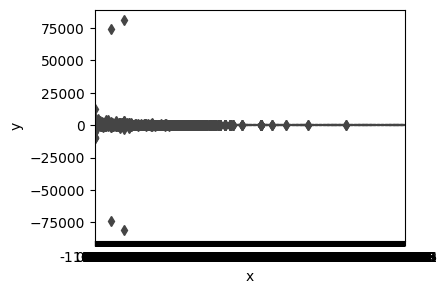

In [ ]:
#outlier detection
plt.figure(figsize=(4, 3))
sns.boxplot(data=df, x='UnitPrice', y='Quantity')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Defining a function to detect and remove outliers using IQR
def remove_outliers_iqr(df, columns, threshold=1.5):
    outliers = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return df.drop(outliers)

# threshold defining
threshold = 1.5

#removing it
df_cleaned = remove_outliers_iqr(df, numeric_columns, threshold)

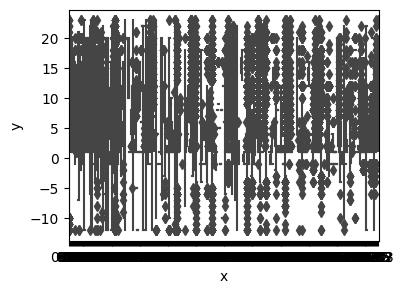

In [ ]:
#outlier detection
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_cleaned, x='UnitPrice', y='Quantity')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
df=df_cleaned

In [ ]:
categorical_columns = df['CustomerID']

In [ ]:
# Specific columns for scaling
numeric_columns = df[['UnitPrice','Quantity']]

# conversion to numeric data type
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Standardizing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_columns)

# Clustering/ Pattern Mining

In [ ]:
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

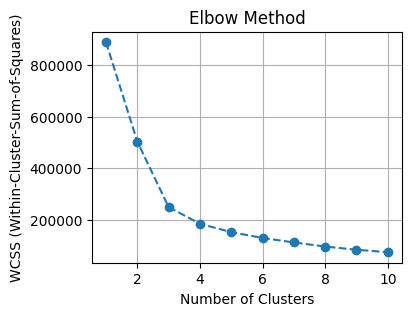

In [ ]:
# Plotting the Elbow method graph to choose the optimal number of clusters
plt.figure(figsize=(4, 3))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.grid()
plt.show()

Clearly, we can see the elbow exists just at 3.

In [ ]:
df.columns

Index(['StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'], dtype='object')

In [ ]:
# Based on the Elbow method, the optimal number of clusters is 3
optimal_clusters = 3

# Performing K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(numeric_columns)

df['Cluster'] = cluster_labels

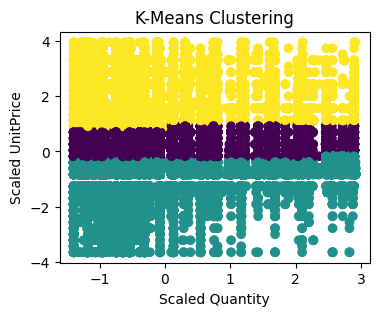

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(4, 3))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Scaled Quantity')
plt.ylabel('Scaled UnitPrice')
plt.title('K-Means Clustering')
plt.show()

User defined problem:

In [ ]:
# Giving an user input
user_data_point = {
    'Quantity': 10,
    'UnitPrice': 2.5
}

# Predicting the cluster for the user-provided data point
user_data_point_array = np.array([user_data_point['Quantity'], user_data_point['UnitPrice']]).reshape(1, -1)
predicted_cluster = kmeans.predict(user_data_point_array)[0]

# Finding the cluster center for the predicted cluster
cluster_center = cluster_centers[predicted_cluster]

print(f"User data point belongs to Cluster {predicted_cluster + 1}");
print(f"Cluster Center for Cluster {predicted_cluster + 1}: {cluster_center}");

User data point belongs to Cluster 2
Cluster Center for Cluster 2: [3.12882322 1.4716307 ]
